# Principal Component Analysis

Come abbiamo potuto vedere, la dimensionalità del dataset corrisponde al numero di features che esso contiene.<br><br>
Dunque ridurre la dimensionalità vuol dire ridurre il numero di features per passare a uno spazio dimensionale inferiore.<br><br> 
La **Principal Component Analysis (PCA)** è la tecnica di riduzione della dimensionalità non supervisionata più diffusa.

#### Perchè ridurre la dimensionalità ?
* Meno dimensioni vuol dire meno features, e meno features vuol dire meno pesi da ottimizzare. Dunque meno sforzo computazionale e maggiore velocità per il processo.
* Per agevolare la visualizzazione grafica.

#### Tecniche di PCA: Features Selection
Consiste nello scartare, fra le features del dataset, quelle che riteniamo meno utili per la nostra analisi.

#### Tecniche di PCA: Features Extraction
Consiste nel generare, a partire dalle features del dataset, delle nuove features, attraverso una combinazione lineare delle prime (previa standardizzazione delle stesse).

#### PCA
La PCA è la tecnica di riduzione della dimensionalità non supervisionata più utilizzata; in sintesi, comprime proprietà che sono correlate fra loro in un'unica proprietà,
e lo fa identificando le direzioni di maggiore varianza nei dati, che vengono chiamate **componenti principali** (dall'inglese principal components), in quanto sono ritenute le proprietà che detengono maggiore informazione.<br><br>
La prima componente principale è la direzione di maggior varianza, le altre sono le direzioni di maggior varianza ortogonali alle precedenti. L'ortogonalità ci assicura che ogni componente sia indipendente dalle altre e quindi contenga informazioni differente.
<img src="pca.png" width="400px"/>
Nell'ambito della riduzione della dimensionalità, come faccio a decidere quante mantenerne ?
* **Definizione manuale a priori**: lo decidiamo prima. Semplice.
<br>
* **Definizione di un valore minimo della varianza**: definizione di un valore minimo della varianza da mantenere a seguito della riduzione dimensionale, per cui è naturale conseguenza selezionare il numero di componenti principali.
<br><br>
La PCA, come le altre tecniche di riduzione della dimensionalità, può essere utilizzata principlamente per due scopi, visualizzare i dati in 2 o 3 dimensioni oppure velocizzare la fase di addestramento, in questo notebook li vedremo entrambi.<br>
Importiamo le librerie che utilizzeremo.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
import time
import seaborn as sns

# PCA per creare visualizzazioni
Il dataset che utilizzeremo è il Wine Dataset, un dataset di vini contenente 13 proprietà che permettono di suddivedere i vini in 3 differenti categorie. 
<br>
Un dataset con 13 proprietà ha 13 dimensioni, ma noi possiamo visualizzare i dati in 2, massimo 3, dimensioni. Applichiamo la PCA al Wine Dataset per eseguire una riduzione dimensionale da 13 a 2 dimensioni.
<br><br>
Cominciamo importando il dataset dalla repository.

In [3]:
cols = ["label","alcol","acido malico","cenere","alcalinità della cenere","magnesio",
        "fenoli totali","flavonoidi","fenoli non-flavonoidi","proantocianidine", 
        "intensità del colore","tonalità", "OD280/OD315 dei vini diluiti","prolina"]


wines = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", 
                 names=cols)

wines.head()

,label,alcol,acido malico,cenere,alcalinità della cenere,magnesio,fenoli totali,flavonoidi,fenoli non-flavonoidi,proantocianidine,intensità del colore,tonalità,OD280/OD315 dei vini diluiti,prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wines.var(axis=0)              # varianza, per ogni feature

label                               0.600679
alcol                               0.659062
acido malico                        1.248015
cenere                              0.075265
alcalinità della cenere            11.152686
magnesio                          203.989335
fenoli totali                       0.391690
flavonoidi                          0.997719
fenoli non-flavonoidi               0.015489
proantocianidine                    0.327595
intensità del colore                5.374449
tonalità                            0.052245
OD280/OD315 dei vini diluiti        0.504086
prolina                         99166.717355
dtype: float64

Settiamo seaborn per renderle più eleganti le visualizzazioni che andremo a creare.

In [5]:
sns.set()

Creiamo gli array numpy, dato che il nostro scopo è solo quello di visualizzare i dati e non creare un modello possiamo anche non dividerli in set di addestramento e test.

In [6]:
X = wines.drop("label", axis=1)
y = wines["label"]

Prima di applicare la PCA dobbiamo essere **SICURISSIMI** che i dati siano su una scala comune, quindi eseguiamo al standardizzazione.

In [7]:
sc = StandardScaler()
X = sc.fit_transform(X)

Adesso possiamo eseguire la Principal Component Analysis utilizzando la classe PCA di sklearn specificando il numero di componenti desiderate, cioè 2, all'interno del costruttore.

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pc = pca.fit_transform(X)

Utilizziamo matplotlib per visualizzare le due componenti su di uno scatter plot.

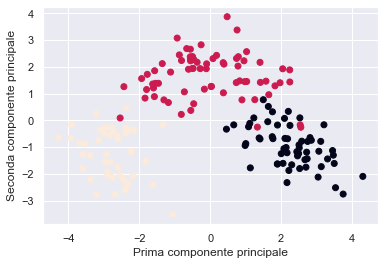

In [9]:
plt.xlabel("Prima componente principale")
plt.ylabel("Seconda componente principale")
plt.scatter(X_pc[:,0], X_pc[:,1], c=y)

Nonostante la riduzione da 13 a 2 proprietà la suddivisione delle classi all'interno del dataset è ben visibile.

### Quante componenti principali selezionare ?
Nell'esempio, volendo costruire una visualizzazione, la scelta era forzata a 2 o 3, ma in altri casi vorremmo poter selezionare il numero di componenti principali che ci permettono di ridurre la complessità del modello mantenendo la maggior quantità possibile di informazione (cioè di varianza).
<br><br>
Per avere un'idea possiamo visualizzare graficamente la percentuale di varianza contenuta da ogni componente insieme alla varianza comulativa di tutte le possibili componenti, o di una parte di esse.
<br><br> 
Per prima cosa dobbiamo prima creare tutte le componenti principali, possiamo farlo impostando il parametro <span style="font-family: Monaco">n_components</span> a None.

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pc = pca.fit(X)
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

Adesso in <span style="font-family: Monaco">pca</span> sono presenti le 13 componenti principali, <span style="font-family: Monaco">explained_variance_ratio_</span> contiene la percentuale della varianza totale che ogni singola componente contiene.
<br><br>
Utilizziamo un grafico a barre in combinazione con uno step chart per visualizzare la varianza per ogni singola componente e la varianza cumulativa. Per eseguire una somma cumulativa possiamo usare la funzione <span style="font-family: Monaco">cumsum</span> di Numpy.

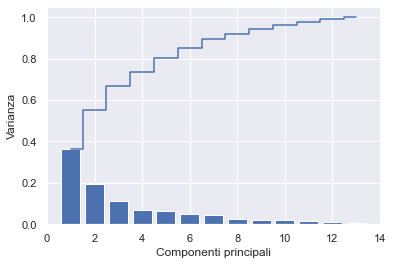

In [11]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, align='center') # varianza per singola componente
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid') #varianza cumulativa
plt.ylabel('Varianza')
plt.xlabel('Componenti principali')
plt.show()

Come vedi la prima componente da sola contiene quasi il 40% della varianza, mentre le prime 4 insieme arrivano quasi al 80%.

# PCA per ridurre il tempo di addestramento
Adesso vediamo come utilizzare la PCA per velocizzare la fase di addestramento comprimendo il numero di proprietà, cercando allo stesso tempo di mantenere buona parte della varianza.
<br>
A questo scopo utilizzeremo il MNIST dataset, il dataset di cifre scritte a mano, nella sua versione integrale con 70.000 esempi e 784 proprietà, una per ogni pixel dell'immagine.

Se non lo hai già fatto puoi scaricare il dataset da [questo sito](http://yann.lecun.com/exdb/mnist/), devi scaricare i seguenti 4 files:
 * train-images-idx3-ubyte.gz
 * train-labels-idx1-ubyte.gz
 * t10k-images-idx3-ubyte.gz
 * t10k-labels-idx1-ubyte.gz
 
poi decomprimili e inseriscili all'interno di una cartella "MNIST", **senza rinominarli**.<br>
I files con le proprietà contengono immagini in formato binario, quindi ho scritto una funzione che ti permette di ottenere direttamente gli array di train e test da questi files (la puoi trovare all'interno del file mnist.py)

In [12]:
from scripts.mnist import load_mnist

X_train, X_test, Y_train, Y_test = load_mnist(path="MNIST")
print("Numero totale di proprietà: "+str(X_train.shape[1]))
print("Esempi di training: "+str(X_train.shape[0]))
print("Esempi di test: "+str(X_test.shape[0]))

Numero totale di proprietà: 784
Esempi di training: 60000
Esempi di test: 10000


Adesso dobbiamo portare i dati sulla stessa scala, che ripeto è **FONDAMENTALE** per il funzionamento del PCA, trattandosi di immagini dobbiamo eseguire la normalizzazione.

In [13]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

Scriviamo una funzione che ci permetterà di creare e addestrare un modello di regressione logistica e di visualizzarne i risultati.

In [14]:
def make_lr(train_set, test_set):
    
    X_train, Y_train = train_set
    X_test, Y_test = test_set
    
    lr = LogisticRegression(solver = 'lbfgs')

    start_time = time.time()
    lr.fit(X_train,Y_train)
    end_time = time.time()

    y_pred_train = lr.predict(X_train)
    y_prob_train = lr.predict_proba(X_train)

    y_pred = lr.predict(X_test)
    y_prob = lr.predict_proba(X_test)

    accuracy_train = accuracy_score(Y_train, y_pred_train)
    accuracy_test = accuracy_score(Y_test, y_pred)

    loss_train = log_loss(Y_train, y_prob_train)
    loss_test = log_loss(Y_test, y_prob)

    print("Numero di componenti: %d" % X_train.shape[1])
    print("Tempo di addestramento: %.4f secondi" % (end_time-start_time))
    print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
    print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))

Creiamo il modello senza utilizzare la PCA e osserviamo i risultati.

In [15]:
make_lr((X_train, Y_train),(X_test,Y_test))

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Numero di componenti: 784
Tempo di addestramento: 23.7456 secondi
ACCURACY: TRAIN=0.9347 TEST=0.9251
LOG LOSS: TRAIN=0.2375 TEST=0.2692


Un po' lento, adesso proviamo ad eseguire la PCA, questa volta piuttosto che specificare il numero di componenti specifichiamo il numero di varianza che vogliamo mantenere, sempre all'interno del costruttore.

In [16]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [17]:
make_lr((X_train_pca, Y_train),(X_test_pca, Y_test))

Numero di componenti: 154
Tempo di addestramento: 9.0563 secondi
ACCURACY: TRAIN=0.9274 TEST=0.9227
LOG LOSS: TRAIN=0.2624 TEST=0.2703


C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Rinunciando solo al 5% di varianza abbiamo ridotto il tempo di addestramento di molto, nel mio caso di 4.5x (da 45 secondi a meno di 10). Anche le metriche del nostro modello sono lievemente peggiorate, ma questo è normale avendo ridotto l'informazione disponibile.
<br><br>
Adesso creiamo un loop per confrontare i risultati eseguendo la PCA con diversi valori per la varianza.

In [18]:
from sklearn.linear_model import LogisticRegression

variances = [0.99, 0.95, 0.90, 0.85, 0.75]

for variance in variances:
    
    print("Varianza: %.2f" % variance)
    
    pca = PCA(variance)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    make_lr((X_train_pca, Y_train),(X_test_pca, Y_test))
    
    print("------------------------------")

Varianza: 0.99


C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Numero di componenti: 332
Tempo di addestramento: 12.7754 secondi
ACCURACY: TRAIN=0.9347 TEST=0.9244
LOG LOSS: TRAIN=0.2373 TEST=0.2698
------------------------------
Varianza: 0.95


C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Numero di componenti: 154
Tempo di addestramento: 9.2233 secondi
ACCURACY: TRAIN=0.9274 TEST=0.9227
LOG LOSS: TRAIN=0.2624 TEST=0.2703
------------------------------
Varianza: 0.90


C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Numero di componenti: 87
Tempo di addestramento: 6.9670 secondi
ACCURACY: TRAIN=0.9201 TEST=0.9191
LOG LOSS: TRAIN=0.2841 TEST=0.2827
------------------------------
Varianza: 0.85


C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Numero di componenti: 59
Tempo di addestramento: 8.2478 secondi
ACCURACY: TRAIN=0.9136 TEST=0.9165
LOG LOSS: TRAIN=0.3037 TEST=0.2960
------------------------------
Varianza: 0.75
Numero di componenti: 34
Tempo di addestramento: 6.4443 secondi
ACCURACY: TRAIN=0.8982 TEST=0.9021
LOG LOSS: TRAIN=0.3478 TEST=0.3350
------------------------------


C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Riducendo il valore della varianza si riduce il numero di proprietà e quindi il numero di pesi da ottimizzare e ne segue che l'addestramento è più veloce, ma allo stesso tempo si perdono informazioni e quindi le performance del nostro modello peggioreranno.